In [3]:
#Libraries 
import pandas as pd

pd.set_option("display.max_rows", None)  # show all rows
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Getting the Data 

In [57]:
# import 4 dataset
pesticides = pd.read_csv("../data/raw/pesticides.csv")
rainfall = pd.read_csv("../data/raw/rainfall.csv")
temp = pd.read_csv("../data/raw/temp.csv")
yieldd = pd.read_csv("../data/raw/yield.csv")
# retrive dataset overview
pesticides.info()
pesticides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


Domain     Area Element                Item  Year  \
0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
2  Pesticides Use  Albania     Use  Pesticides (total)  1992   
3  Pesticides Use  Albania     Use  Pesticides (total)  1993   
4  Pesticides Use  Albania     Use  Pesticides (total)  1994   

                           Unit  Value  
0  tonnes of active ingredients  121.0  
1  tonnes of active ingredients  121.0  
2  tonnes of active ingredients  121.0  
3  tonnes of active ingredients  121.0  
4  tonnes of active ingredients  201.0

In [58]:
rainfall.info()
rainfall.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


Area  Year average_rain_fall_mm_per_year
0  Afghanistan  1985                           327
1  Afghanistan  1986                           327
2  Afghanistan  1987                           327
3  Afghanistan  1989                           327
4  Afghanistan  1990                           327

In [59]:
temp.info()
temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


year        country  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

In [60]:
yieldd.info()
yieldd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400

## Data compilation

In [61]:
# 1.pesticides
pesticides.nunique()

Domain        1
Area        168
Element       1
Item          1
Year         27
Unit          1
Value      2825
dtype: int64

In [ ]:
# rename column in pesticides dataset
pesticides = pesticides.rename(columns={"Value": "pesticides_used_in_ton"})
# remove irrelavant columns in pesticides dataset
pesticides = pesticides.drop(columns=["Domain", "Element", "Item", "Unit"])

In [ ]:
# 2.rainfall
# convert object to numeric in rainfall dataset
rainfall["average_rain_fall_mm_per_year"] = pd.to_numeric(
    rainfall["average_rain_fall_mm_per_year"], errors="coerce"
)
# strip spaces from all column names in rainfall dataset
rainfall.columns = rainfall.columns.str.strip()

In [ ]:
# 3.temp
# rename column in temp dataset
temp = temp.rename(columns={"year": "Year", "country": "Area"})

# 5.yieldd
yieldd.nunique()
# rename column in yieldd dataset
yieldd = yieldd.rename(columns={"Value": "yield_in_hg_per_ha"})
# remove irrelavant columns in yieldd dataset
yieldd = yieldd.drop(
    columns=[
        "Area Code",
        "Item Code",
        "Year Code",
        "Domain Code",
        "Domain",
        "Element",
        "Element Code",
        "Unit",
    ]
)

In [ ]:
# compile all dataset
combined_df = pd.merge(pesticides, rainfall, how="inner", on=["Area", "Year"])
combined_df = combined_df.merge(temp, how="inner", on=["Area", "Year"])
combined_df = combined_df.merge(yieldd, how="inner", on=["Area", "Year"])

In [66]:
combined_df.isnull().sum()

Area                             0
Year                             0
pesticides_used_in_ton           0
average_rain_fall_mm_per_year    6
avg_temp                         0
Item                             0
yield_in_hg_per_ha               0
dtype: int64

In [67]:
combined_df[combined_df.isnull().any(axis=1)]

Area  Year  pesticides_used_in_ton  average_rain_fall_mm_per_year  \
1986  Bahamas  1990                  484.59                            NaN   
1987  Bahamas  1990                  484.59                            NaN   
1988  Bahamas  1990                  484.59                            NaN   
1989  Bahamas  1991                  484.59                            NaN   
1990  Bahamas  1991                  484.59                            NaN   
1991  Bahamas  1991                  484.59                            NaN   

      avg_temp            Item  yield_in_hg_per_ha  
1986     25.74         Cassava              106667  
1987     25.74           Maize               15000  
1988     25.74  Sweet potatoes               38118  
1989     25.66         Cassava              100000  
1990     25.66           Maize               16667  
1991     25.66  Sweet potatoes               31385

In [68]:
combined_df = combined_df.dropna()

In [ ]:
# Save combined_df to CSV in the given path
combined_df.to_csv(path_or_buf="../data/processed/combined_df.csv", index=False)

## Data exploration

### Exploration (duplicate, missing, Summary Statistics)

In [ ]:
# import combined dataset
combined_df = pd.read_csv("../data/processed/combined_df.csv")

In [71]:
combined_df = combined_df.rename(columns={
    "Area": "area",
    "Year": "year",
    "pesticides_used_in_ton": "pesticides_ton",
    "average_rain_fall_mm_per_year": "rainfall_mm",
    "avg_temp": "temp_c",
    "Item": "item",
    "yield_in_hg_per_ha": "yield_hg_per_ha",
})

In [72]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             28242 non-null  object 
 1   year             28242 non-null  int64  
 2   pesticides_ton   28242 non-null  float64
 3   rainfall_mm      28242 non-null  float64
 4   temp_c           28242 non-null  float64
 5   item             28242 non-null  object 
 6   yield_hg_per_ha  28242 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [73]:
combined_df.nunique()

area                 101
year                  23
pesticides_ton      1673
rainfall_mm          100
temp_c              1831
item                  10
yield_hg_per_ha    11514
dtype: int64

In [74]:
combined_df.describe(include="object")  # Summary Statistics for Categorical Variables

area      item
count   28242     28242
unique    101        10
top     India  Potatoes
freq     4048      4276

In [75]:
combined_df["item"].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [76]:
combined_df["item"] = combined_df["item"].replace("Rice, paddy", "Rice") #Rename

In [77]:
combined_df["year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

In [78]:
combined_df.isnull().sum()  # missing value

area               0
year               0
pesticides_ton     0
rainfall_mm        0
temp_c             0
item               0
yield_hg_per_ha    0
dtype: int64

In [79]:
# duplicate
combined_df.duplicated().sum()
#duplicates = combined_df[combined_df.duplicated()]
#print(duplicates)

np.int64(2310)

In [80]:
combined_df = combined_df.drop_duplicates()  # drop the duplicate
combined_df.duplicated().sum()  # check for duplicate

np.int64(0)

In [81]:
combined_df.isnull().sum() # missing value

area               0
year               0
pesticides_ton     0
rainfall_mm        0
temp_c             0
item               0
yield_hg_per_ha    0
dtype: int64

In [82]:
# Summary Statistics for Numerical Variables¶
combined_df.describe().round(2).T

count      mean       std      min       25%       50%  \
year             25932.0   2001.56      7.06  1990.00   1995.00   2001.00   
pesticides_ton   25932.0  34782.57  57228.57     0.04   1597.00  15373.00   
rainfall_mm      25932.0   1146.84    717.39    51.00    593.00   1083.00   
temp_c           25932.0     20.42      6.44     1.30     16.58     21.42   
yield_hg_per_ha  25932.0  76978.13  84647.61    50.00  19996.00  39530.00   

                       75%        max  
year               2008.00    2013.00  
pesticides_ton    45620.00  367778.00  
rainfall_mm        1668.00    3240.00  
temp_c               26.06      30.65  
yield_hg_per_ha  104168.00  501412.00

In [83]:
combined_df["area"].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

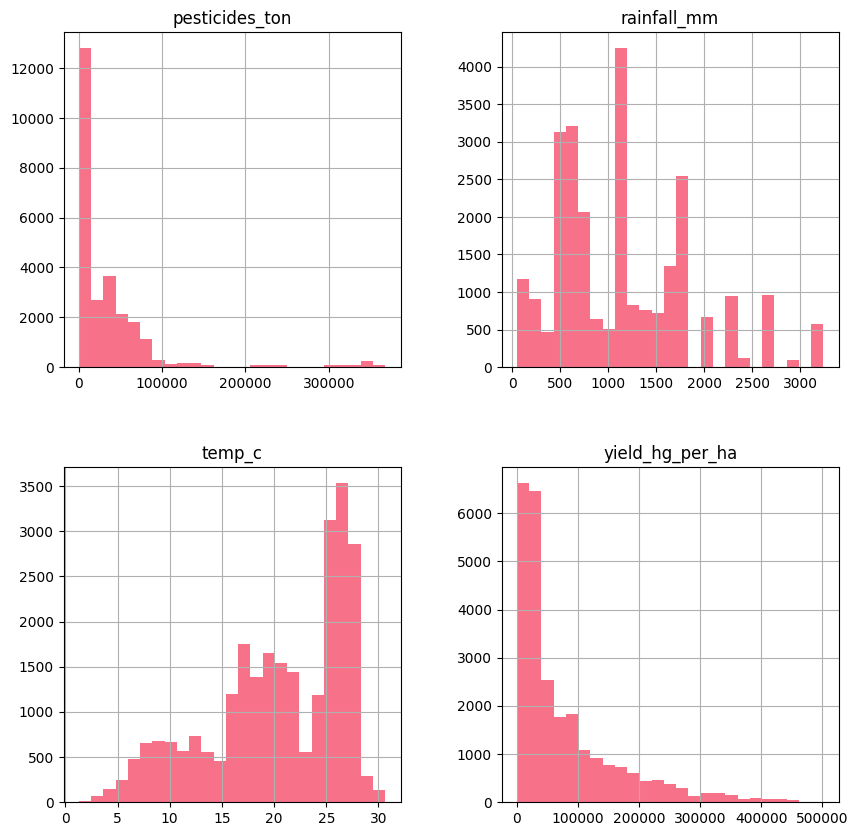

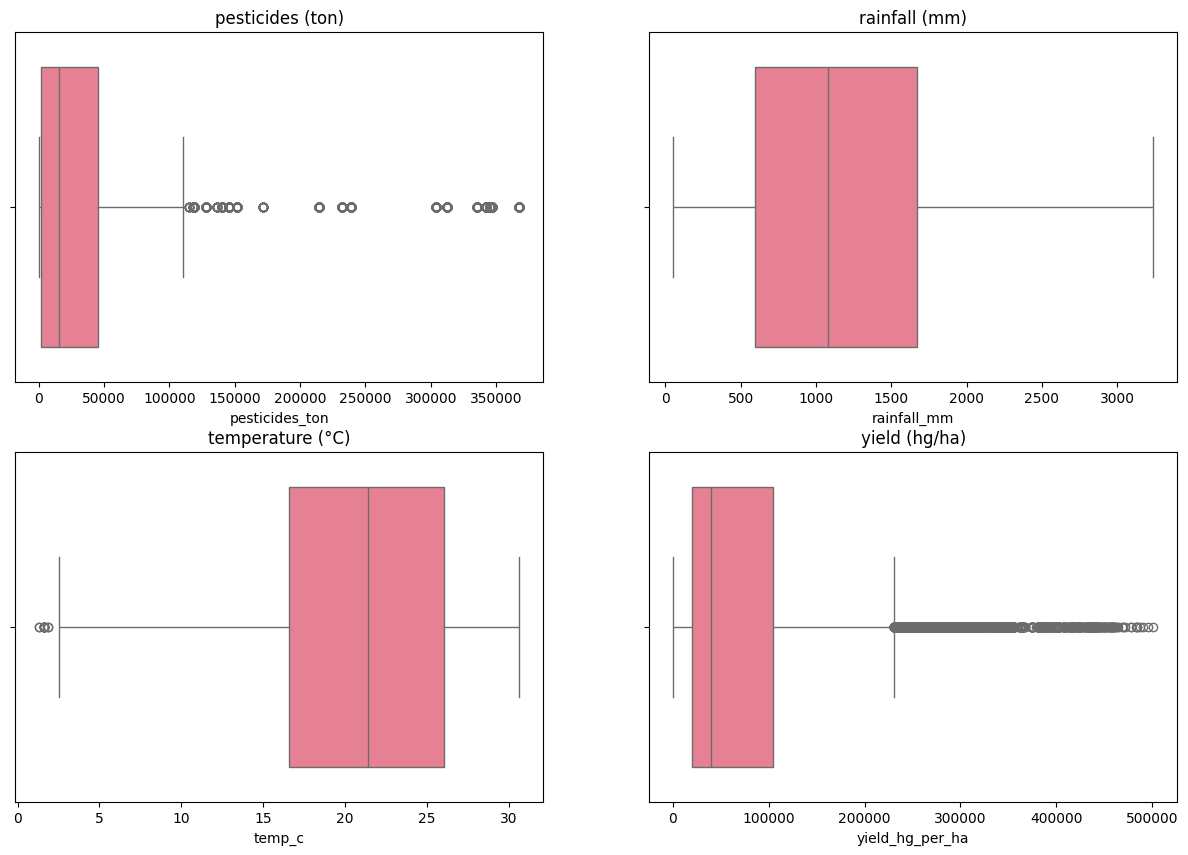

In [84]:
# data distribution (histogram)
combined_df1 = combined_df.drop(columns=["year"])
combined_df1.hist(bins=25, figsize=(10, 10))
# data distribution (boxplot)
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)

sns.boxplot(data=combined_df1["pesticides_ton"], orient="h")
plt.title("pesticides (ton)")
plt.subplot(2, 2, 2)
sns.boxplot(data=combined_df1["rainfall_mm"], orient="h")
plt.title("rainfall (mm)")
plt.subplot(2, 2, 3)
sns.boxplot(data=combined_df1["temp_c"], orient="h")
plt.title("temperature (°C)")
plt.subplot(2, 2, 4)
sns.boxplot(data=combined_df1["yield_hg_per_ha"], orient="h")
plt.title("yield (hg/ha)")
plt.show()

In [85]:
country_counts = combined_df["area"].value_counts()

In [86]:
# Data pruning,remove countries with less than 100 record
country_todrop = country_counts[country_counts < 100].index.tolist()
combined_df_filtered = combined_df[~combined_df["area"].isin(country_todrop)]
print(combined_df_filtered)

                           area  year  pesticides_ton  rainfall_mm  temp_c  \
99                      Algeria  1990         1828.92         89.0   17.48   
100                     Algeria  1990         1828.92         89.0   17.48   
101                     Algeria  1990         1828.92         89.0   17.48   
102                     Algeria  1990         1828.92         89.0   17.48   
103                     Algeria  1990         1828.92         89.0   17.48   
104                     Algeria  1991         2461.80         89.0   16.26   
105                     Algeria  1991         2461.80         89.0   16.26   
106                     Algeria  1991         2461.80         89.0   16.26   
107                     Algeria  1991         2461.80         89.0   16.26   
108                     Algeria  1991         2461.80         89.0   16.26   
109                     Algeria  1992         1215.47         89.0   16.27   
110                     Algeria  1992         1215.47         89

In [87]:
combined_df_filtered.describe(include="object")

area      item
count   23987     23987
unique     71        10
top     India  Potatoes
freq     3384      3404

In [88]:
country = combined_df_filtered["area"].unique().tolist()
print(country)

['Algeria', 'Angola', 'Argentina', 'Australia', 'Azerbaijan', 'Bangladesh', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'Colombia', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Morocco', 'Mozambique', 'Nepal', 'Nicaragua', 'Niger', 'Pakistan', 'Papua New Guinea', 'Peru', 'Portugal', 'Romania', 'Rwanda', 'Saudi Arabia', 'Senegal', 'South Africa', 'Spain', 'Sri Lanka', 'Suriname', 'Tajikistan', 'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'United Kingdom', 'Uruguay', 'Zambia', 'Zimbabwe']


<class 'pandas.core.frame.DataFrame'>
Index: 23987 entries, 99 to 28241
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             23987 non-null  object 
 1   year             23987 non-null  int64  
 2   pesticides_ton   23987 non-null  float64
 3   rainfall_mm      23987 non-null  float64
 4   temp_c           23987 non-null  float64
 5   item             23987 non-null  object 
 6   yield_hg_per_ha  23987 non-null  int64  
 7   pesticides_log   23987 non-null  float64
 8   yield_log        23987 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.8+ MB


C:\Users\User\AppData\Local\Temp\ipykernel_16196\2713217158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_filtered["pesticides_log"] = np.log1p(
C:\Users\User\AppData\Local\Temp\ipykernel_16196\2713217158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_filtered["yield_log"] = np.log1p(


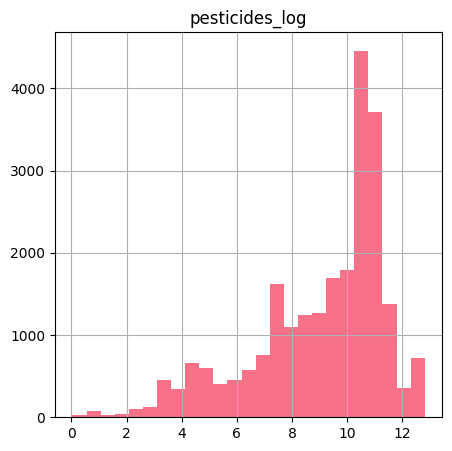

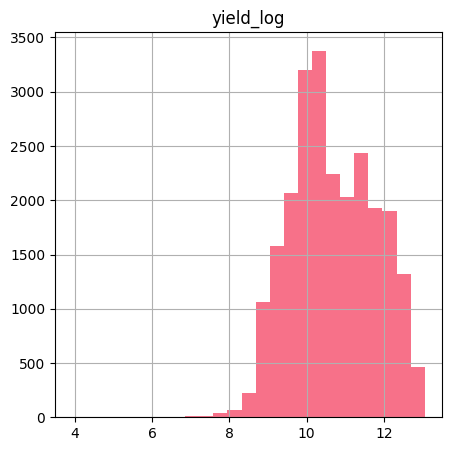

In [89]:
# log transformation on pesticides and yield
combined_df_filtered["pesticides_log"] = np.log1p(
    combined_df_filtered["pesticides_ton"]
)  # log(1 + x) ,avoids negatives
combined_df_filtered.hist(column="pesticides_log", bins=25, figsize=(5, 5))

combined_df_filtered["yield_log"] = np.log1p(
    combined_df_filtered["yield_hg_per_ha"]
)  # log(1 + x) ,avoids negatives
combined_df_filtered.hist(column="yield_log", bins=25, figsize=(5, 5))

combined_df_filtered[
    [
        "pesticides_ton",
        "yield_hg_per_ha",
        "pesticides_log",
        "yield_log",
    ]
].describe().round(2)


combined_df_filtered.info()

### Data distribution

In [90]:
combined_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23987 entries, 99 to 28241
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             23987 non-null  object 
 1   year             23987 non-null  int64  
 2   pesticides_ton   23987 non-null  float64
 3   rainfall_mm      23987 non-null  float64
 4   temp_c           23987 non-null  float64
 5   item             23987 non-null  object 
 6   yield_hg_per_ha  23987 non-null  int64  
 7   pesticides_log   23987 non-null  float64
 8   yield_log        23987 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.8+ MB


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'pesticides_ton'}>,
        <Axes: title={'center': 'rainfall_mm'}>],
       [<Axes: title={'center': 'temp_c'}>,
        <Axes: title={'center': 'yield_hg_per_ha'}>,
        <Axes: title={'center': 'pesticides_log'}>],
       [<Axes: title={'center': 'yield_log'}>, <Axes: >, <Axes: >]],
      dtype=object)

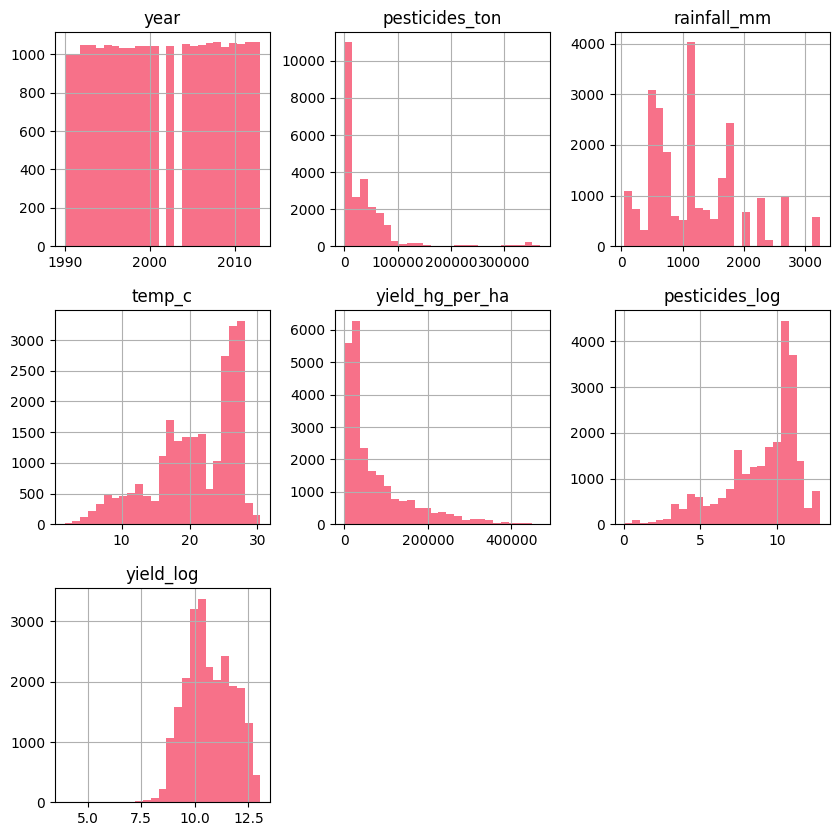

In [91]:
combined_df_filtered.hist(bins=25, figsize=(10, 10))

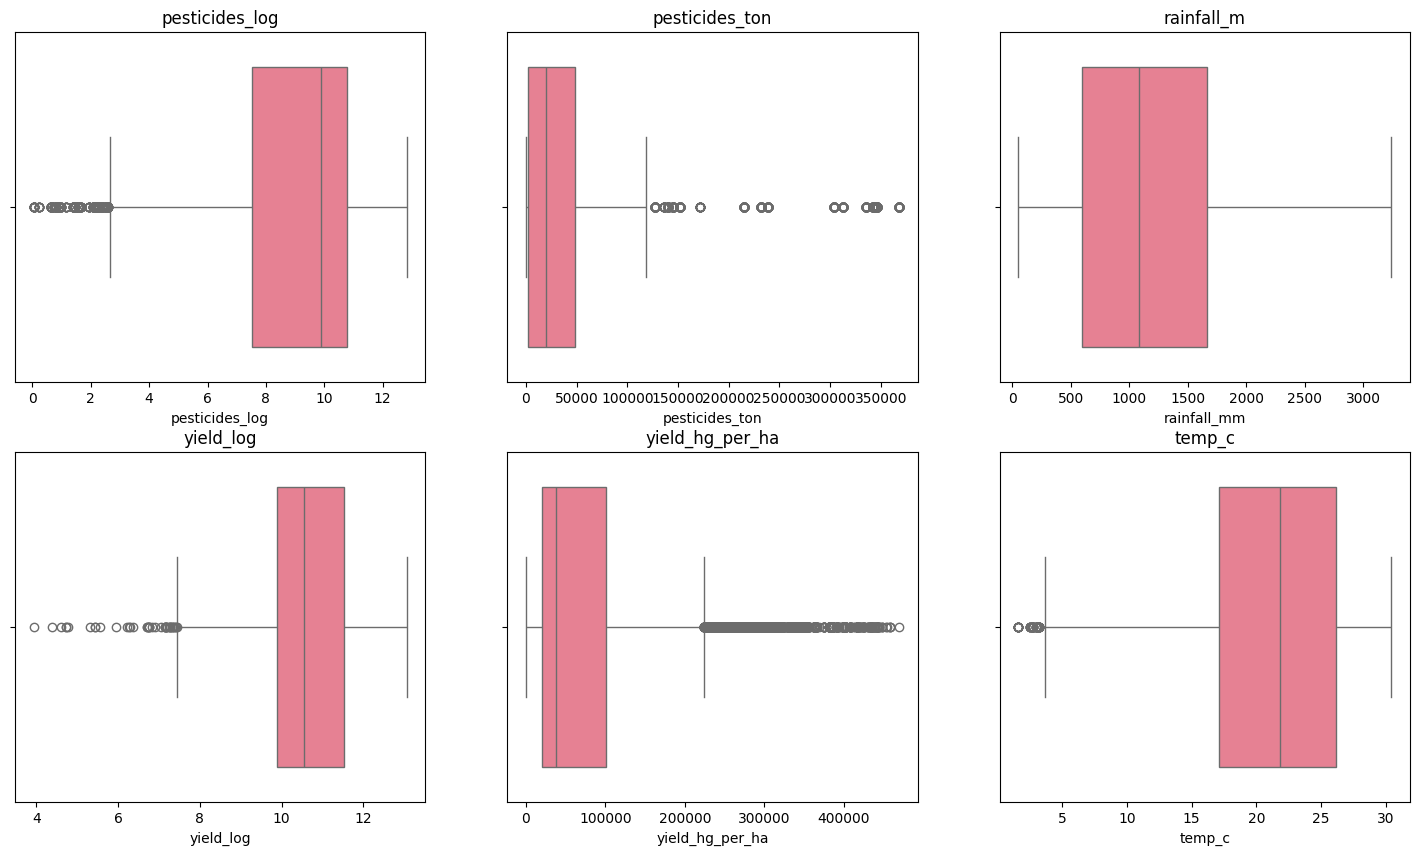

In [92]:
# data distribution (boxplot)
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data=combined_df_filtered["pesticides_log"], orient="h")
plt.title("pesticides_log")
plt.subplot(2, 3, 2)
sns.boxplot(data=combined_df_filtered["pesticides_ton"], orient="h")
plt.title("pesticides_ton")

plt.subplot(2, 3, 3)
sns.boxplot(data=combined_df_filtered["rainfall_mm"], orient="h")
plt.title("rainfall_m")

plt.subplot(2, 3, 4)
sns.boxplot(data=combined_df_filtered["yield_log"], orient="h")
plt.title("yield_log")
plt.subplot(2, 3, 5)
sns.boxplot(data=combined_df_filtered["yield_hg_per_ha"], orient="h")
plt.title("yield_hg_per_ha")

plt.subplot(2, 3, 6)
sns.boxplot(data=combined_df_filtered["temp_c"], orient="h")
plt.title("temp_c")

plt.show()


In [93]:
combined_df_filtered.describe()

year  pesticides_ton   rainfall_mm        temp_c  \
count  23987.000000    23987.000000  23987.000000  23987.000000   
mean    2001.510485    37244.737852   1164.675116     20.903272   
std        7.056520    58757.631059    720.998545      6.111185   
min     1990.000000        0.040000     51.000000      1.610000   
25%     1995.000000     1841.500000    593.000000     17.140000   
50%     2001.000000    19508.000000   1083.000000     21.860000   
75%     2008.000000    48721.620000   1668.000000     26.150000   
max     2013.000000   367778.000000   3240.000000     30.420000   

       yield_hg_per_ha  pesticides_log     yield_log  
count     23987.000000    23987.000000  23987.000000  
mean      75205.889482        9.044368     10.672884  
std       82161.611391        2.412720      1.090043  
min          50.000000        0.039221      3.931826  
25%       19757.000000        7.518879      9.891314  
50%       38223.000000        9.878631     10.551219  
75%      101277.000000       10.793899     11.525624  
max      468991.000000       12.815237     13.058341

In [94]:
combined_df_filtered = combined_df_filtered.drop(columns=['pesticides_ton','yield_hg_per_ha'])
#Variables with strong right skew, such as pesticide usage and crop yield, were log-transformed to reduce the influence of extreme values.
# The original variables were subsequently removed to avoid redundancy

### Outliers

In [95]:
combined_df_filtered.describe()

year   rainfall_mm        temp_c  pesticides_log     yield_log
count  23987.000000  23987.000000  23987.000000    23987.000000  23987.000000
mean    2001.510485   1164.675116     20.903272        9.044368     10.672884
std        7.056520    720.998545      6.111185        2.412720      1.090043
min     1990.000000     51.000000      1.610000        0.039221      3.931826
25%     1995.000000    593.000000     17.140000        7.518879      9.891314
50%     2001.000000   1083.000000     21.860000        9.878631     10.551219
75%     2008.000000   1668.000000     26.150000       10.793899     11.525624
max     2013.000000   3240.000000     30.420000       12.815237     13.058341

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'rainfall_mm'}>],
       [<Axes: title={'center': 'temp_c'}>,
        <Axes: title={'center': 'pesticides_log'}>],
       [<Axes: title={'center': 'yield_log'}>, <Axes: >]], dtype=object)

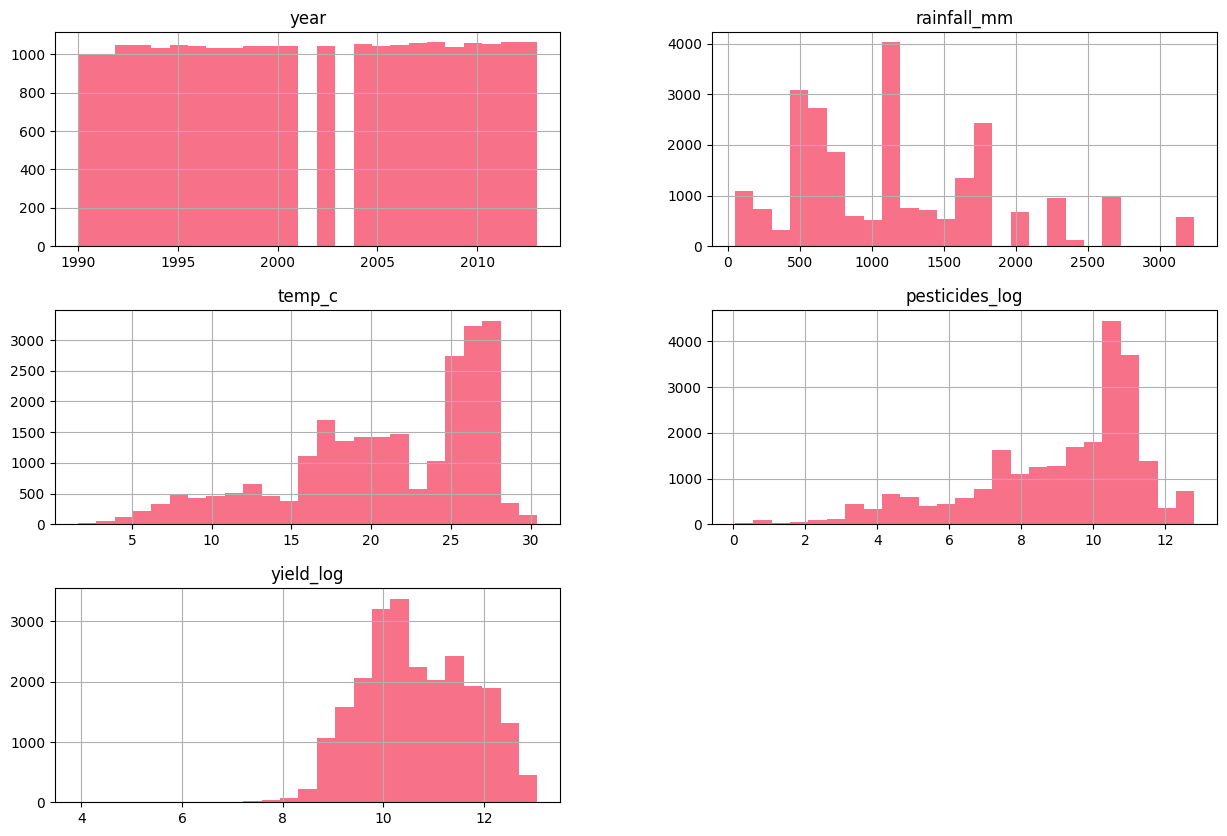

In [96]:
combined_df_filtered.hist(bins=25, figsize=(15, 10))

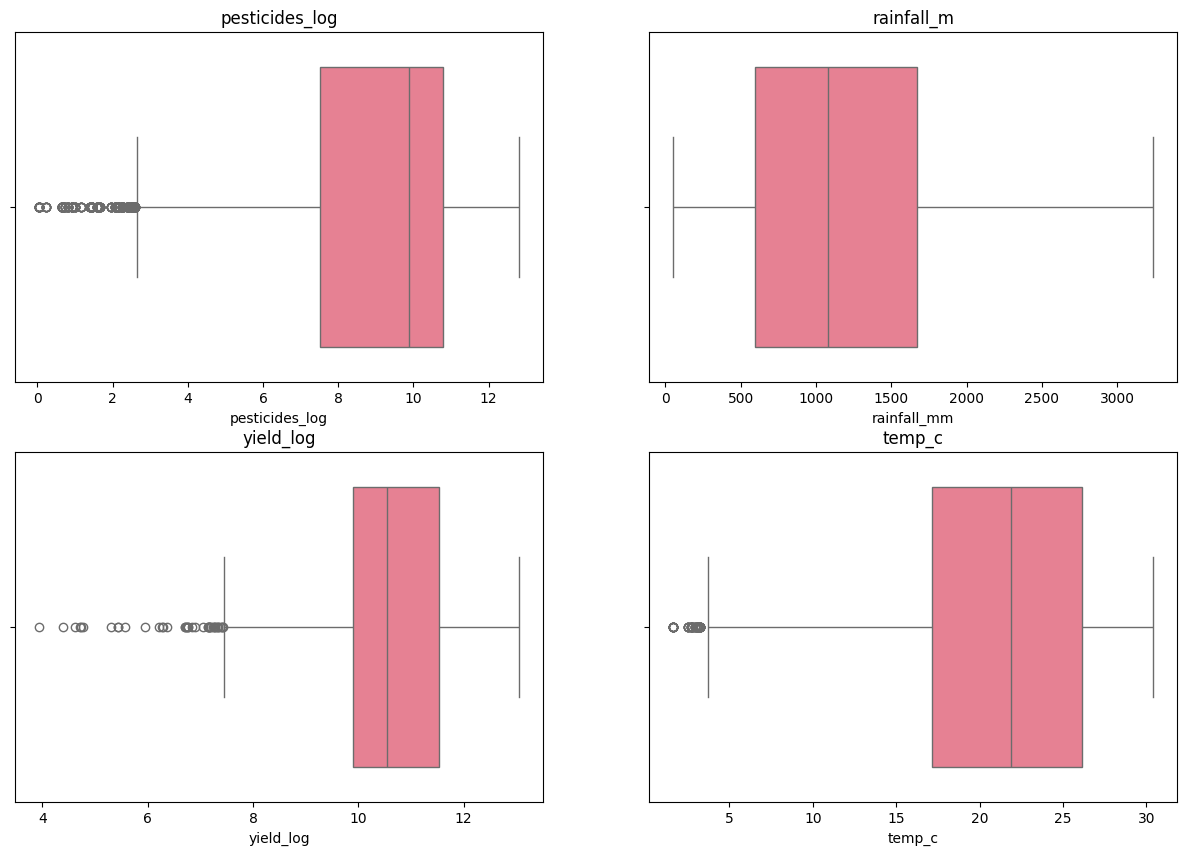

In [97]:
# data distribution (boxplot)
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=combined_df_filtered["pesticides_log"], orient="h")
plt.title("pesticides_log")

plt.subplot(2, 2, 2)
sns.boxplot(data=combined_df_filtered["rainfall_mm"], orient="h")
plt.title("rainfall_m")

plt.subplot(2, 2, 3)
sns.boxplot(data=combined_df_filtered["yield_log"], orient="h")
plt.title("yield_log")

plt.subplot(2, 2, 4)
sns.boxplot(data=combined_df_filtered["temp_c"], orient="h")
plt.title("temp_c")

plt.show()


In [98]:
cols = ["rainfall_mm", "temp_c", "pesticides_log", "yield_log"]

for col in cols:
    Q1 = combined_df_filtered[col].quantile(0.25)
    Q3 = combined_df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(col, "outliers:",
          ((combined_df_filtered[col] < lower) |
           (combined_df_filtered[col] > upper)).sum())


rainfall_mm outliers: 0
temp_c outliers: 60
pesticides_log outliers: 277
yield_log outliers: 42


### Correlation

In [99]:
datacorr= combined_df_filtered.copy()

In [100]:
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()

Text(0.5, 1.0, 'Heatmap')

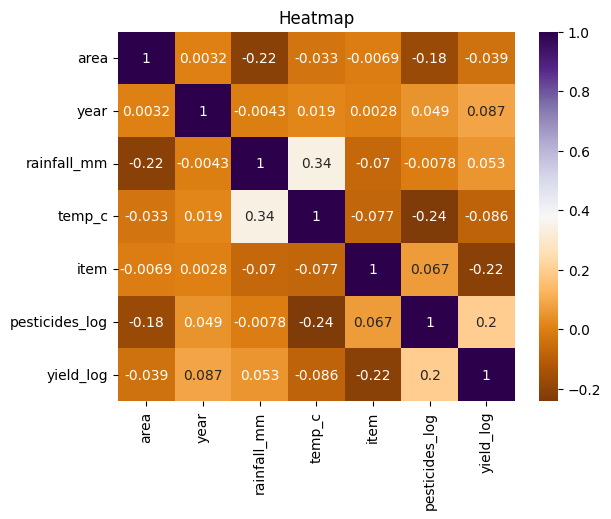

In [101]:
label_encoder = LabelEncoder()

for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')
plt.title('Heatmap')

The correlation analysis shows that is no single variable strongly explains crop yield on its own. 
Pesticide usage exhibits the strongest positive association with yield, while crop type (item) has a noticeable negative relationship, indicating structural differences in yield across crops. 
Climate variables such as rainfall and temperature show weak linear correlations with yield, suggesting that yield formation is influenced by complex, non-linear interactions rather than simple linear effects. 

### Trend Analysis 

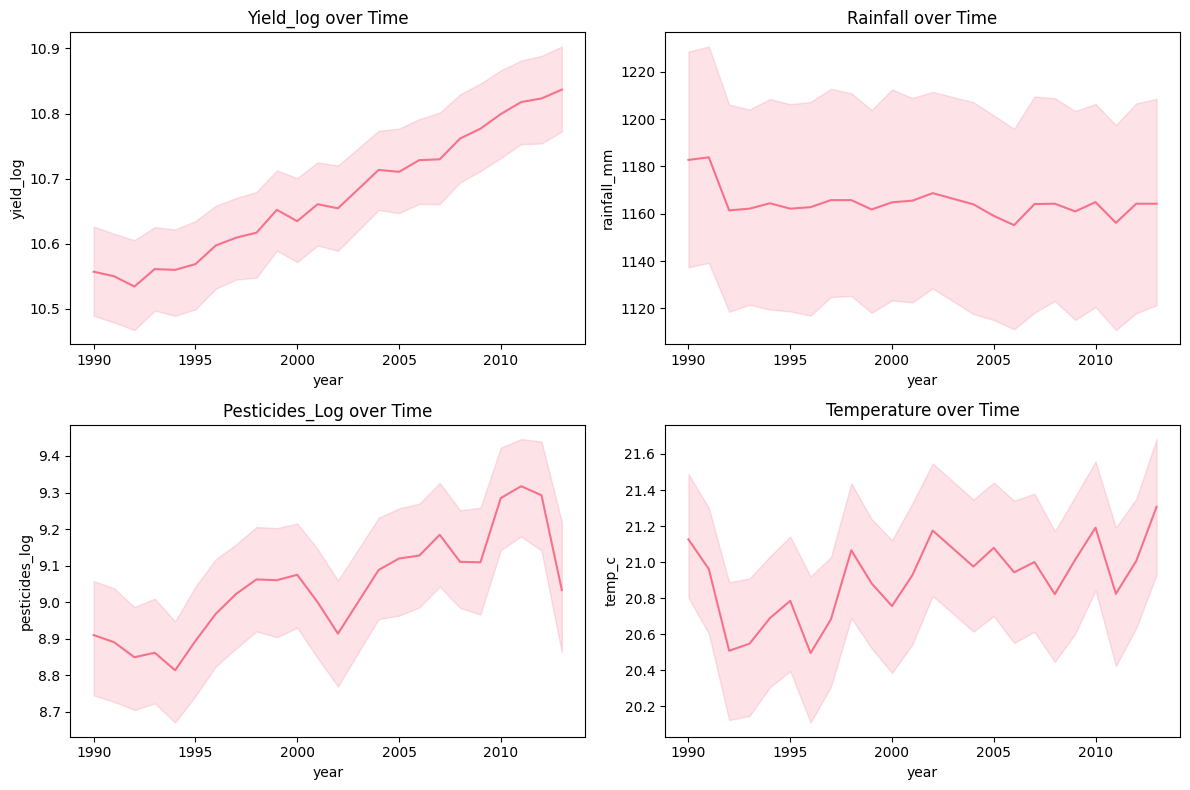

In [102]:
# Select relevant columns
selected_columns = ['year', 'yield_log', 'rainfall_mm', 'pesticides_log', 'temp_c']
selected_df = combined_df_filtered[selected_columns]

# Set 'year' as the index
selected_df.set_index('year', inplace=True)

# Plot line charts for each variable
plt.figure(figsize=(12, 8))

# Line plot for 'yield_log'
plt.subplot(2, 2, 1)
sns.lineplot(data=selected_df['yield_log'])
plt.title('Yield_log over Time')
# Line plot for 'rainfall_mm'
plt.subplot(2, 2, 2)
sns.lineplot(data=selected_df['rainfall_mm'])
plt.title('Rainfall over Time')
# Line plot for 'pesticides_log'
plt.subplot(2, 2, 3)
sns.lineplot(data=selected_df['pesticides_log'])
plt.title('Pesticides_Log over Time')
# Line plot for 'temp_c'
plt.subplot(2, 2, 4)
sns.lineplot(data=selected_df['temp_c'])
plt.title('Temperature over Time')

plt.tight_layout()
plt.show()

Time-series analysis shows a steady increase in crop yield over the study period, indicating long-term improvements in agricultural productivity. Rainfall remains relatively stable with high inter-annual variability. 
Pesticide usage shows a clear upward trend, aligning with increased yield levels and supporting its importance as a predictive feature. 
Average temperature exhibits a gradual rise, reflecting climate change, but its impact on yield appears non-linear and crop-dependent. 


These findings highlight the need for non-linear models to capture complex interactions between climatic and management factors.

### Descriptive Analysis 

<Figure size 1400x800 with 0 Axes>

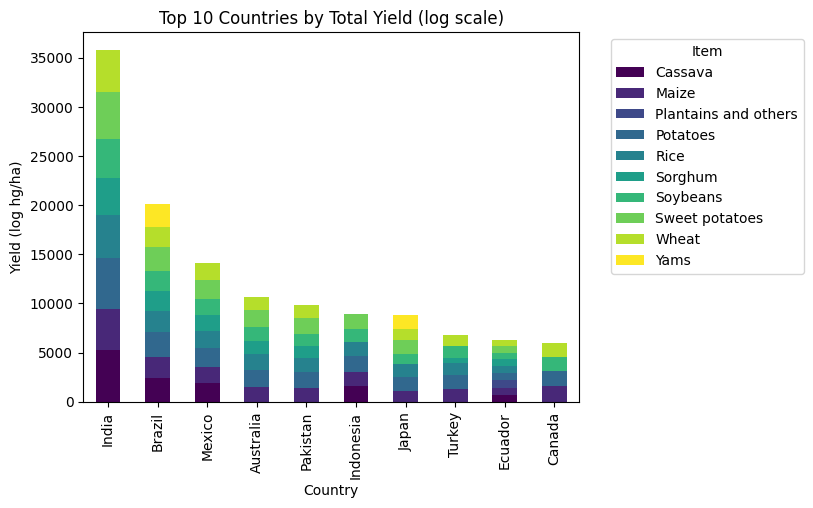

In [103]:
top_10_areas = (
    combined_df_filtered
    .groupby('area')['yield_log']
    .sum()
    .nlargest(10)
    .index
)

df_top_10_areas = combined_df_filtered[
    combined_df_filtered['area'].isin(top_10_areas)
]

top_10_items_areas = (
    df_top_10_areas
    .groupby(['area', 'item'])['yield_log']
    .sum()
)

pivot_table = top_10_items_areas.unstack('item', fill_value=0)

# Sort bars high → low
pivot_table = pivot_table.loc[
    pivot_table.sum(axis=1).sort_values(ascending=False).index
]

plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 10 Countries by Total Yield (log scale)')
plt.xlabel('Country')
plt.ylabel('Yield (log hg/ha)')
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


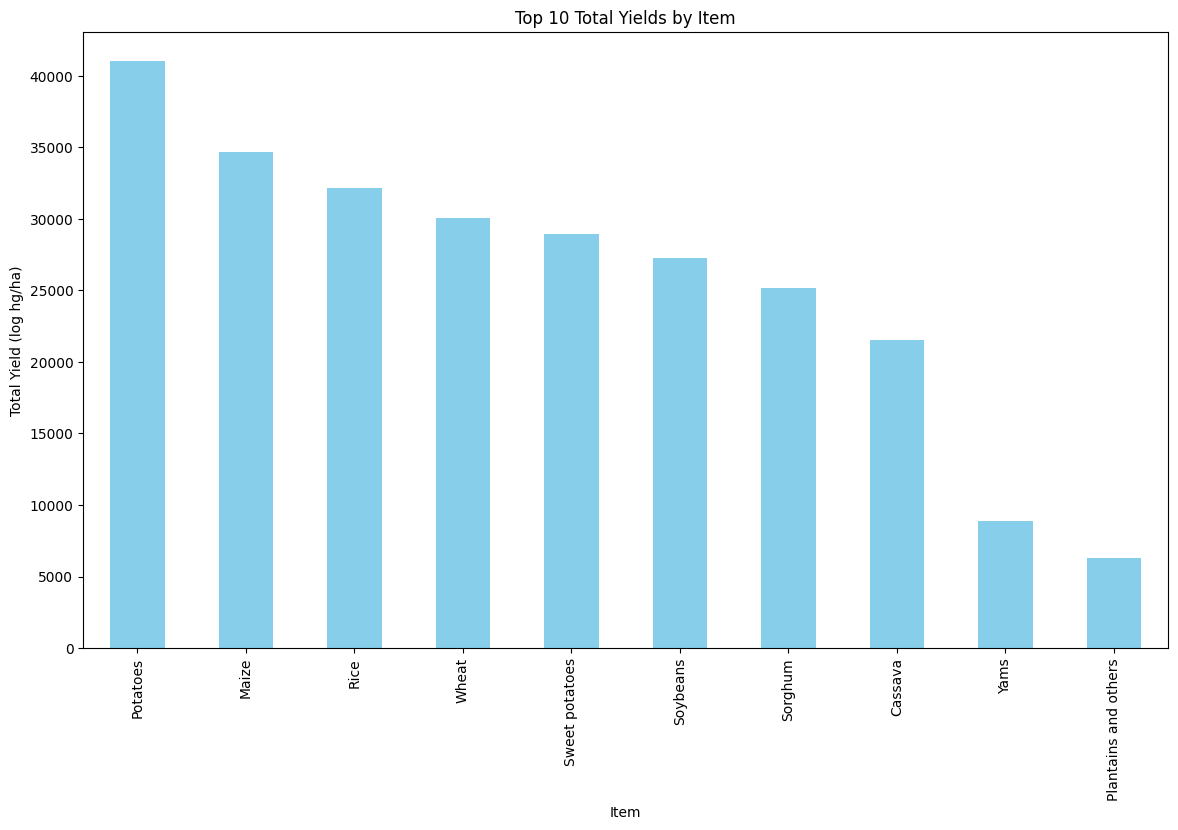

In [104]:
# Group by 'Item' and 'Area', sum the yield, then select the top 20
top_10_items = combined_df_filtered.groupby('item', sort=True)['yield_log'].sum().nlargest(10)

# Plot a bar chart for 'Item' and 'yield_log'
plt.figure(figsize=(14, 8))
top_10_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Total Yields by Item')
plt.xlabel('Item')
plt.ylabel('Total Yield (log hg/ha)')
plt.show()

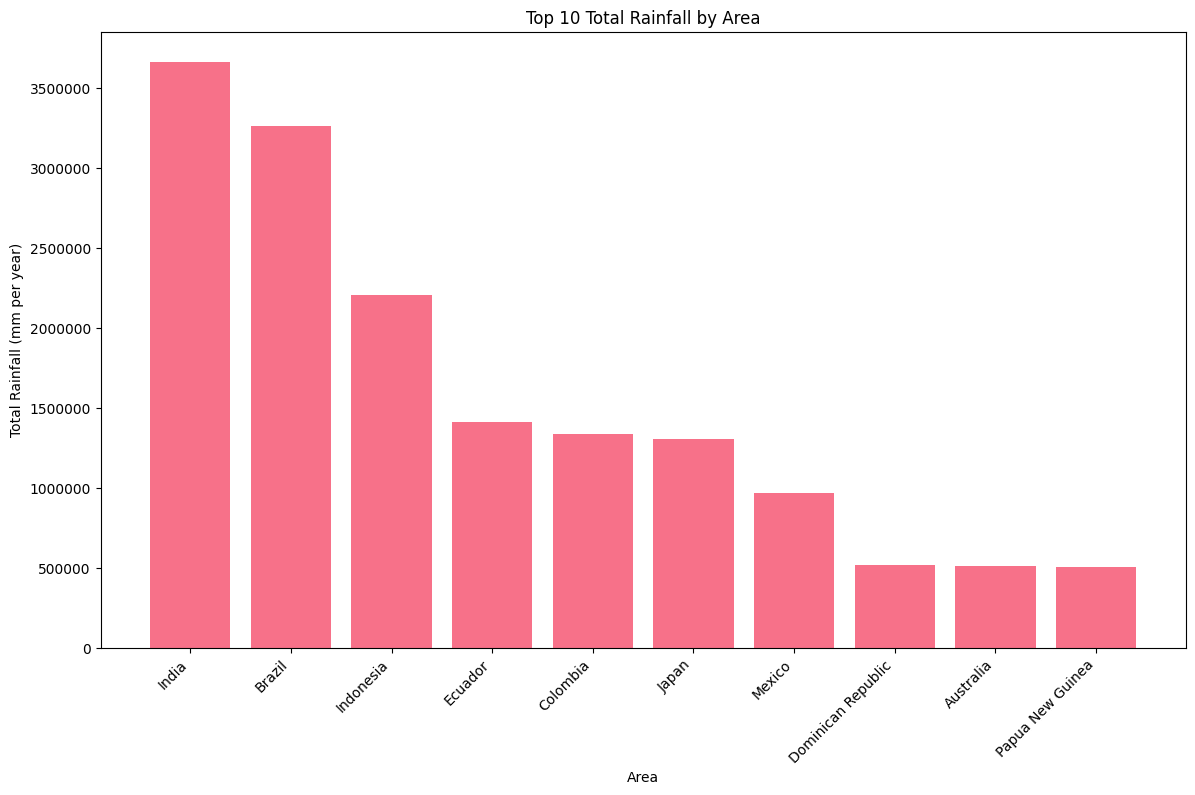

In [105]:
# Group by 'Area', calculate the sum of 'rainfall_mm' for each area
top_10_areas_rainfall = combined_df_filtered.groupby('area')['rainfall_mm'].sum().nlargest(10)

plot_df = pd.DataFrame({'area': top_10_areas_rainfall.index, 'Total Rainfall (mm per year)': top_10_areas_rainfall.values})

sns.set_palette('husl')

# Plot a bar chart
plt.figure(figsize=(14, 8))
plt.bar(plot_df['area'], plot_df['Total Rainfall (mm per year)'])
plt.title('Top 10 Total Rainfall by Area')
plt.xlabel('Area')
plt.ylabel('Total Rainfall (mm per year)')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

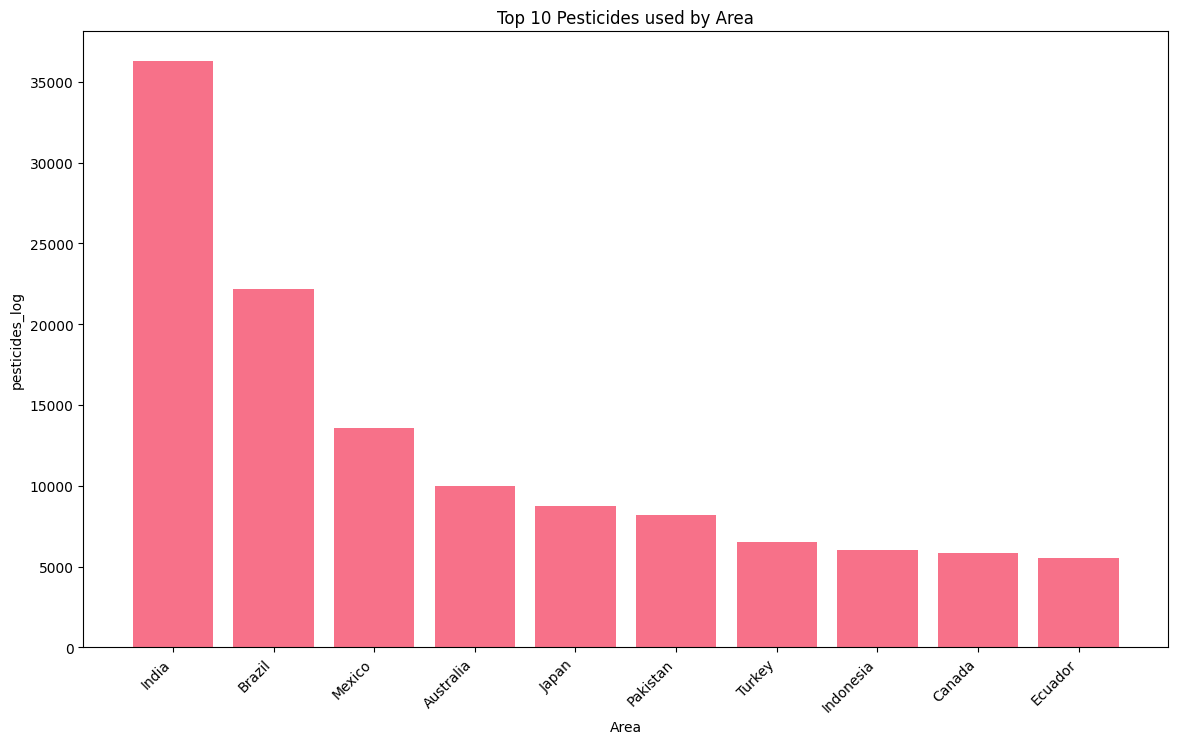

In [106]:
# Group by 'Area', calculate the sum of 'pesticides_log' for each area
top_10_areas_pesticides = combined_df_filtered.groupby('area')['pesticides_log'].sum().nlargest(10)

plot_df = pd.DataFrame({'area': top_10_areas_pesticides.index, 'pesticides_log': top_10_areas_pesticides.values})

sns.set_palette('husl')

# Plot a bar chart
plt.figure(figsize=(14, 8))
plt.bar(plot_df['area'], plot_df['pesticides_log'])
plt.title('Top 10 Pesticides used by Area')
plt.xlabel('Area')
plt.ylabel('pesticides_log')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Data splitting and Target encoding

In [107]:
#check total unique count of Area & Item
unique_countA = combined_df_filtered['area'].nunique()
unique_countB = combined_df_filtered['item'].nunique()
print(f"Total unique count in 'area': {unique_countA}")
print(f"Total unique count in 'item': {unique_countB}")

Total unique count in 'area': 71
Total unique count in 'item': 10


In [108]:
#data split
X = combined_df_filtered.drop(columns='yield_log')
y = combined_df_filtered['yield_log']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [109]:
#install package
!pip install category_encoders


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import category_encoders as ce

In [111]:
# target encoding on training data only
encoder = ce.TargetEncoder(cols=['area', 'item'])

X_train_enc = encoder.fit_transform(
    X_train[['area','item']],
    y_train
)

X_test_enc = encoder.transform(
    X_test[['area','item']]
)

In [112]:
#Recombine with numeric features
X_train_final = (
    X_train.drop(columns=['area','item'])
    .join(X_train_enc)
)

X_test_final = (
    X_test.drop(columns=['area','item'])
    .join(X_test_enc)
)

In [ ]:
# Save combined_df to CSV in the given path
X_train_final.to_csv(path_or_buf="../data/processed/X_train.csv", index=False)
X_test_final.to_csv(path_or_buf="../data/processed/X_test.csv", index=False)
y_train.to_csv(path_or_buf="../data/processed/y_train.csv", index=False)
y_test.to_csv(path_or_buf="../data/processed/y_test.csv", index=False)

## Modelling

In [1]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
import joblib

In [ ]:
# import saved dataset
X_train=  pd.read_csv("../data/processed/X_train.csv")
X_test=  pd.read_csv("../data/processed/X_test.csv")
y_train=pd.read_csv("../data/processed/y_train.csv")
y_test= pd.read_csv("../data/processed/y_test.csv")

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19189 entries, 0 to 19188
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            19189 non-null  int64  
 1   rainfall_mm     19189 non-null  float64
 2   temp_c          19189 non-null  float64
 3   pesticides_log  19189 non-null  float64
 4   area            19189 non-null  float64
 5   item            19189 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 899.6 KB


In [118]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            4798 non-null   int64  
 1   rainfall_mm     4798 non-null   float64
 2   temp_c          4798 non-null   float64
 3   pesticides_log  4798 non-null   float64
 4   area            4798 non-null   float64
 5   item            4798 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 225.0 KB


In [119]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19189 entries, 0 to 19188
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yield_log  19189 non-null  float64
dtypes: float64(1)
memory usage: 150.0 KB


In [120]:
y_test.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yield_log  4798 non-null   float64
dtypes: float64(1)
memory usage: 37.6 KB


### Linear Regression, Decision Tree, Random Forest

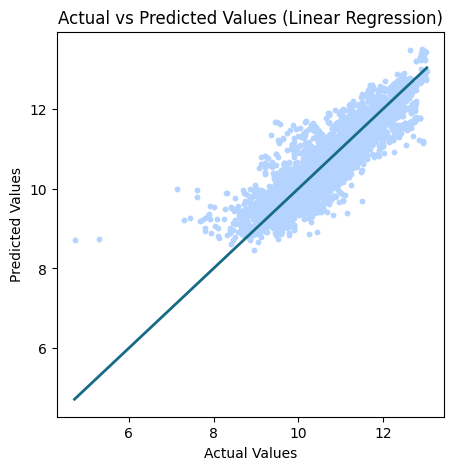

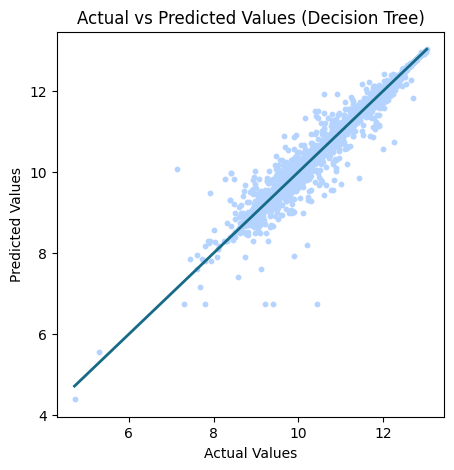

d:\MDS project\crop-yield-predition\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


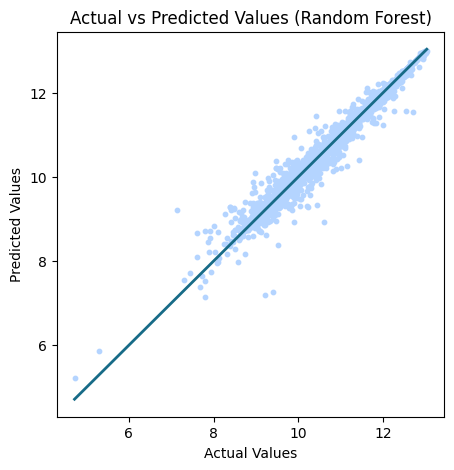

In [8]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MSE = mean_squared_error(y_test, y_pred)
    RMSE = root_mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)

    results.append((name, R2_score, MSE, RMSE, MAE))

    #acc = model.score(X_train, y_train) * 100
    #print(f'The accuracy of the {name} Model Train is {acc:.2f}')

    #acc = model.score(X_test, y_test) * 100
    #print(f'The accuracy of the {name} Model Test is {acc:.2f}')

    y_test_1d = y_test.iloc[:, 0]
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test_1d, y_pred, s=10, color='#B4D4FF')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values ({name})')
    plt.plot(
        [y_test_1d.min(), y_test_1d.max()],
        [y_test_1d.min(), y_test_1d.max()],
        color='#176B87',
        linewidth=2
    )
    plt.show()


In [6]:
dff = pd.DataFrame(
    results,
    columns=['Model', 'R2_score', 'MSE', 'RMSE', 'MAE']
)

df_styled_best = (
    dff.style
    .highlight_max(subset=['R2_score'], color="#517A50")
    .highlight_min(subset=['MSE', 'RMSE', 'MAE'], color="#617A60")
    .highlight_max(subset=['MSE', 'RMSE', 'MAE'], color="#9253B6")
    .highlight_min(subset=['R2_score'], color="#825165")
)

display(df_styled_best)


**Key observations**

- Random Forest achieved the best overall performance, with the highest R² (0.981), and the lowest MSE (0.022), RMSE (0.149), and MAE (0.063), showing the smallest prediction errors.

- Decision Tree also performed strongly with high R2 score and low error values.

- Linear Regression showed the weakest performance, with low R2 score and the highest error metrics, suggesting that linear assumptions are insufficient to capture the nonlinear relationships in the data.

### Hyperparameter Tunning

In [9]:
# defining parameter range
model_params={
'Linear Regression':{
	'model': LinearRegression(),
	'params':{
    'positive':[True, False]
	}
},
'Decision Tree':{
	'model': DecisionTreeRegressor(),
	'params':{
  'max_depth':[None, 5,10]
	}
},
'Random Forest':{
	'model': RandomForestRegressor(),
	'params':{
	'n_estimators':[70,100,120], #default=100 : number of trees you want to build. Higher number of trees give you better performance but makes your code slower.
	#max_features - default is Auto/None : This will simply take all the features which make sense in every tree.
	'min_samples_leaf':[1,20, 50] #default=1 : Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data
	}
}
}

scores = []
for model_name, mp in model_params.items():
    # fitting the model for grid search
    grid = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False, refit = True, verbose = 3,n_jobs=-1)
    grid.fit(X_train, y_train)
    scores.append({
		'model':model_name,
		'best_score':grid.best_score_,
		'best_params':grid.best_params_
		})

# print best parameter after tuning
df=pd.DataFrame(scores, columns=['model','best_score','best_params'])
df


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


d:\MDS project\crop-yield-predition\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


model  best_score                                   best_params
0  Linear Regression    0.812428                           {'positive': False}
1      Decision Tree    0.964183                           {'max_depth': None}
2      Random Forest    0.980556  {'min_samples_leaf': 1, 'n_estimators': 120}

Random Forest is the most optimal model for Crop Yield Prediction among the other 2 models.

### Best Model (Random Forest): Predicted Vs Actual

In [10]:
# Train the best model with optimal hyperparameters
best_model = RandomForestRegressor(
    n_estimators=120,
    min_samples_leaf=1,
    random_state=42
)
best_model.fit(X_train, y_train)

# predictions
y_pred = best_model.predict(X_test)

# metrics
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")

d:\MDS project\crop-yield-predition\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R-squared (R²): 0.9811
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
Mean Absolute Error (MAE): 0.06


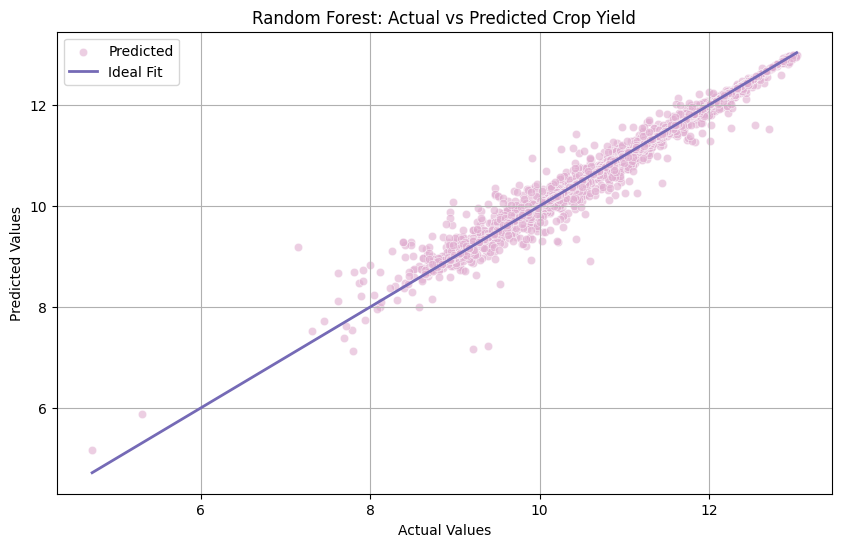

In [ ]:
#plotting the results of our model, against the original results
y_test_1d = y_test.iloc[:, 0]

plt.figure(figsize=(10, 6))

# scatter of predictions
sns.scatterplot(
    x=y_test_1d,
    y=y_pred,
    alpha=0.6,
    color='#E0AED0',
    label='Predicted'
)

# ideal prediction line (y = x)
plt.plot(
    [y_test_1d.min(), y_test_1d.max()],
    [y_test_1d.min(), y_test_1d.max()],
    color='#756AB6',
    linewidth=2,
    label='Ideal Fit'
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted Crop Yield")
plt.grid(True)
plt.legend()
plt.show()

**Conclusion**

- The hyperparameter-tuned Random Forest model demonstrated the best performance, with low prediction errors across all evaluation metrics.

- The low error metrics confirm that the model captures nonlinear relationships between environmental factors and crop yield.


### Variable Importance Stability

In [5]:
# USE TRAINING DATA ONLY
X = X_train
y = y_train

feature_names = X.columns

n_repeats_list = [10, 50, 100]
subsample_fraction = 0.8

results = []
rng = np.random.RandomState(42)

for n_repeats in n_repeats_list:
    importances = []

    for _ in range(n_repeats):
        subsample_idx = rng.choice(
            X.index,
            size=int(len(X) * subsample_fraction),
            replace=False
        )

        X_sub = X.loc[subsample_idx]
        y_sub = y.loc[subsample_idx]

        model = RandomForestRegressor(
            n_estimators=200,
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_sub, y_sub)
        importances.append(model.feature_importances_)

    importances = np.array(importances)

    mean_importance = importances.mean(axis=0)
    mad = np.mean(np.abs(importances - mean_importance), axis=0)

    for f, m, d in zip(feature_names, mean_importance, mad):
        results.append({
            'Repeats': n_repeats,
            'Feature': f,
            'Mean Importance': m,
            'MAD': d
        })

d:\MDS project\crop-yield-predition\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\MDS project\crop-yield-predition\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\MDS project\crop-yield-predition\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\MDS project\crop-yield-predition\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d a

In [6]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(
    by=['Repeats', 'Mean Importance'],
    ascending=[True, False]
)

df_results

Repeats         Feature  Mean Importance       MAD
5        10            item         0.695835  0.001159
4        10            area         0.168023  0.000808
1        10     rainfall_mm         0.053783  0.001144
3        10  pesticides_log         0.032262  0.000693
2        10          temp_c         0.028777  0.000647
0        10            year         0.021319  0.000221
11       50            item         0.695373  0.001635
10       50            area         0.167047  0.001458
7        50     rainfall_mm         0.053232  0.001191
9        50  pesticides_log         0.033801  0.000915
8        50          temp_c         0.029160  0.000569
6        50            year         0.021386  0.000246
17      100            item         0.695158  0.001589
16      100            area         0.167304  0.001602
13      100     rainfall_mm         0.053329  0.001239
15      100  pesticides_log         0.033757  0.000978
14      100          temp_c         0.029046  0.000755
12      100            year         0.021406  0.000233